<a href="https://colab.research.google.com/github/sdazz56/Data-Science-Projects/blob/main/Air_Quality_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PM 2.5.         AQI color (Levels of concern)

0.0 - 12.0 --> Green (Good)

12.1 - 35.4 --> Yellow (Moderate)

35.5 - 55.4 --> Orange (Unhealthy for sensitive groups)

55.5 - 150.4 --> Red (Unhealthy)

150.5 - 250.4 --> Purple ( Very Unhealthy)

250.5 - 500 --> Maroon (Hazardous)

Questions to answer here

1. Show the Year-wise average pollution with a Line chart.
2. Draw the Area plot showing the average pollution Month wise.
3. Draw a Bar graph to show the Hour-wise average pollution.
4. Usually in which month/s, the air was recorded 'Very Unhealthy'.
5. Usually in which month/s, the air was fresh(good).
6. In year 2018, how many times the AQI was recorded 'Moderate'.
7. How was the weather in the month of January and July.

In [20]:
import pandas as pd
import numpy as np

In [21]:
df=pd.read_csv('/content/air-quality-data.csv')
df

,Timestamp,PM2.5
0,01-01-2018 00:00,90.19
1,01-01-2018 01:00,86.98
2,01-01-2018 02:00,86.06
3,01-01-2018 03:00,94.04
4,01-01-2018 04:00,108.78
...,...,...
31856,31-12-2021 19:00,72.25
31857,31-12-2021 20:00,71.56
31858,31-12-2021 21:00,70.27
31859,31-12-2021 22:00,66.78


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31861 entries, 0 to 31860
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  31861 non-null  object 
 1   PM2.5      31861 non-null  float64
dtypes: float64(1), object(1)
memory usage: 498.0+ KB


In [23]:
df.describe()

,PM2.5
count,31861.000000
mean,47.603671
std,24.341598
min,7.020000
25%,26.450000
50%,43.720000
75%,63.610000
max,245.630000


In [24]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df

,Timestamp,PM2.5
0,2018-01-01 00:00:00,90.19
1,2018-01-01 01:00:00,86.98
2,2018-01-01 02:00:00,86.06
3,2018-01-01 03:00:00,94.04
4,2018-01-01 04:00:00,108.78
...,...,...
31856,2021-12-31 19:00:00,72.25
31857,2021-12-31 20:00:00,71.56
31858,2021-12-31 21:00:00,70.27
31859,2021-12-31 22:00:00,66.78


In [101]:

df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Time'] = df['Timestamp'].dt.time

df['Timestamp'].dtype
df['Year'].dtype

dtype('int64')

In [26]:
#df=df.drop('Timestamp',axis=1)

In [27]:
df


,Timestamp,PM2.5,Year,Month,Day,Time
0,2018-01-01 00:00:00,90.19,2018,1,1,00:00:00
1,2018-01-01 01:00:00,86.98,2018,1,1,01:00:00
2,2018-01-01 02:00:00,86.06,2018,1,1,02:00:00
3,2018-01-01 03:00:00,94.04,2018,1,1,03:00:00
4,2018-01-01 04:00:00,108.78,2018,1,1,04:00:00
...,...,...,...,...,...,...
31856,2021-12-31 19:00:00,72.25,2021,12,31,19:00:00
31857,2021-12-31 20:00:00,71.56,2021,12,31,20:00:00
31858,2021-12-31 21:00:00,70.27,2021,12,31,21:00:00
31859,2021-12-31 22:00:00,66.78,2021,12,31,22:00:00


In [28]:
df['Year']=df['Year'].astype(str)
df

,Timestamp,PM2.5,Year,Month,Day,Time
0,2018-01-01 00:00:00,90.19,2018,1,1,00:00:00
1,2018-01-01 01:00:00,86.98,2018,1,1,01:00:00
2,2018-01-01 02:00:00,86.06,2018,1,1,02:00:00
3,2018-01-01 03:00:00,94.04,2018,1,1,03:00:00
4,2018-01-01 04:00:00,108.78,2018,1,1,04:00:00
...,...,...,...,...,...,...
31856,2021-12-31 19:00:00,72.25,2021,12,31,19:00:00
31857,2021-12-31 20:00:00,71.56,2021,12,31,20:00:00
31858,2021-12-31 21:00:00,70.27,2021,12,31,21:00:00
31859,2021-12-31 22:00:00,66.78,2021,12,31,22:00:00


1. Show the Year-wise average pollution with a Line chart.

In [29]:
avg_by_year=df.groupby('Year')['PM2.5'].mean()
#avg_by_year=list(avg_by_year)
avg_by_year

Year
2018    54.468449
2019    49.511273
2020    42.386302
2021    44.850633
Name: PM2.5, dtype: float64

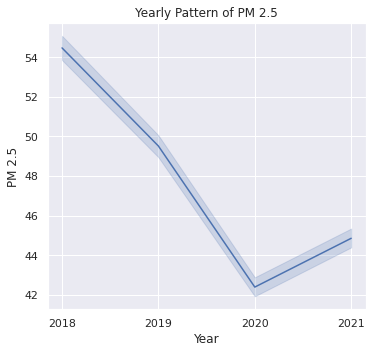

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(5.7,5.27)})
sns.lineplot(x=df['Year'],y=df['PM2.5'])
#plt.plot(x=df['Year'],y=df['PM 2.5']) 
#plt.figure(figsize=(10,10)) 
plt.xlabel("Year")
plt.ylabel("PM 2.5")
plt.title("Yearly Pattern of PM 2.5")
plt.show()

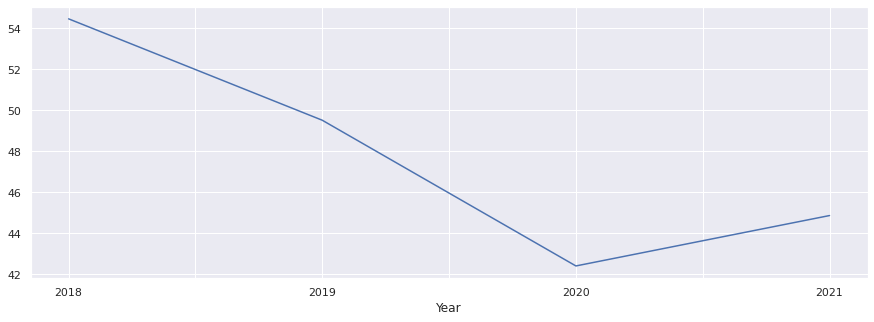

In [31]:
avg_by_year.plot(kind="line",figsize=(15,5))

2. Draw the Area plot showing the average pollution Month wise.

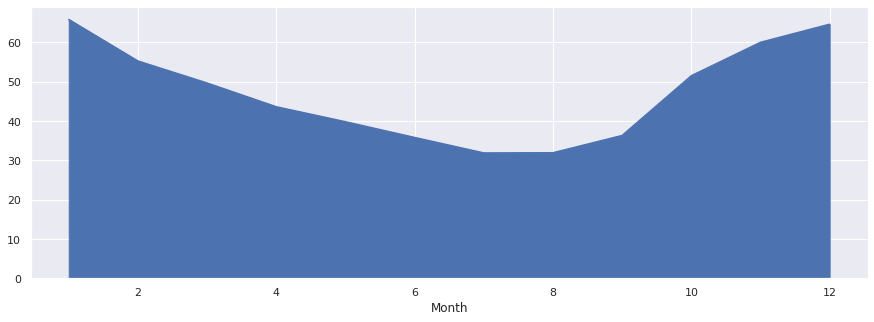

In [34]:
avg_by_month=df.groupby('Month')['PM2.5'].mean()

avg_by_month.plot(kind="area",figsize=(15,5))

3. Draw a Bar graph to show the Hour-wise average pollution.

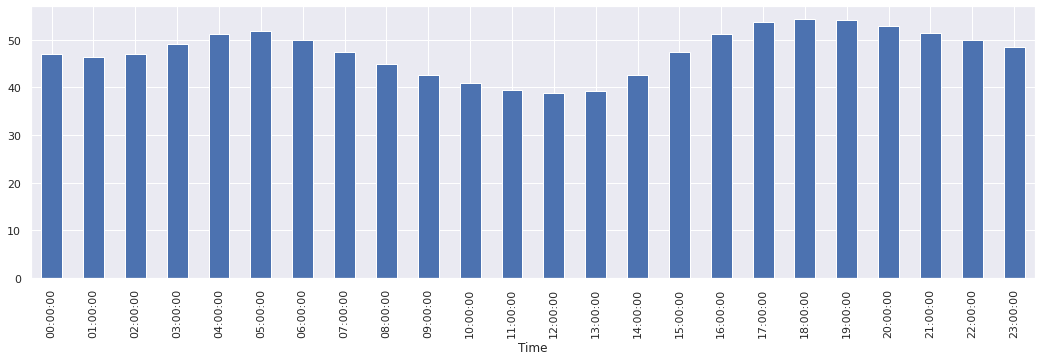

In [39]:
avg_by_hour=df.groupby('Time')['PM2.5'].mean()

avg_by_hour.plot(kind="bar",figsize=(18,5))

4. Usually in which month/s, the air was recorded 'Very Unhealthy'.

In [71]:
x=df[(df['PM2.5']>=150.5) & (df['PM2.5']<=250.4)]
x.value_counts('Month')

Month
11    16
1      5
10     5
2      2
dtype: int64

5. Usually in which month/s, the air was fresh(good).

In [72]:
x=df[(df['PM2.5']>=0) & (df['PM2.5']<=12)]
x.value_counts('Month')

Month
8    33
7     6
6     5
1     3
4     3
5     2
dtype: int64

6. In year 2018, how many times the AQI was recorded 'Moderate'.

In [104]:
y = df[ (df['Year'] == 2018) & (df['PM2.5'] >= 12.1) & (df['PM2.5'] <= 35.4)]
y.value_counts()

Timestamp            PM2.5  Year  Month  Day  Time    
2018-01-04 04:00:00  33.34  2018  1      4    04:00:00    1
2018-08-23 20:00:00  23.68  2018  8      23   20:00:00    1
2018-08-23 14:00:00  21.37  2018  8      23   14:00:00    1
2018-08-23 15:00:00  27.28  2018  8      23   15:00:00    1
2018-08-23 16:00:00  27.33  2018  8      23   16:00:00    1
                                                         ..
2018-07-13 06:00:00  21.25  2018  7      13   06:00:00    1
2018-07-13 05:00:00  23.15  2018  7      13   05:00:00    1
2018-07-13 04:00:00  24.86  2018  7      13   04:00:00    1
2018-07-13 03:00:00  22.75  2018  7      13   03:00:00    1
2018-12-09 23:00:00  26.84  2018  12     9    23:00:00    1
Length: 2239, dtype: int64

In [106]:
y.Year.unique()

array([2018])

In [107]:
y['PM2.5']

1820     33.34
2038     35.39
2215     28.90
2306     34.83
2307     33.50
         ...  
9981     19.75
9982     19.27
9983     18.96
10004    17.45
10006    18.77
Name: PM2.5, Length: 2239, dtype: float64

7. How was the weather in the month of January and July.

In [111]:
#JANUARY
z=df[(df['Month']==1)&(df['PM2.5'])]
z.value_counts('PM2.5')

PM2.5
71.24     4
65.29     4
68.06     4
61.11     4
74.70     4
         ..
56.05     1
56.02     1
55.98     1
55.96     1
177.58    1
Length: 2467, dtype: int64

In [113]:
df[df['Month']==1]['PM2.5'].mean()

65.82906685236769

In [112]:
#JULY
z=df[(df['Month']==7)&(df['PM2.5'])]
z.value_counts('PM2.5')

PM2.5
18.44     7
19.24     7
18.79     6
18.96     6
20.07     6
         ..
26.52     1
26.51     1
26.44     1
26.42     1
127.19    1
Length: 1773, dtype: int64

In [114]:
df[df['Month']==7]['PM2.5'].mean()

31.88416146645866